In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Load Data

In [7]:
import pandas as pd
from IPython.display import display

df = pd.read_csv("C:/Users/sahil/Desktop/WORK/CSET214_project/spotify_dataset.csv")
display(df.iloc[0:6,:])


,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,popularity,decade
0,Jealous Kind Of Fella,Garland Green,spotify:track:1dtKN6wwlolkM8XZy2y9C1,0.417,0.620,3,-7.727,1,0.0403,0.490,0.000000,0.0779,0.845,185.655,173533,3,32.94975,9,1,60s
1,Initials B.B.,Serge Gainsbourg,spotify:track:5hjsmSnUefdUqzsDogisiX,0.498,0.505,3,-12.475,1,0.0337,0.018,0.107000,0.1760,0.797,101.801,213613,4,48.82510,10,0,60s
2,Melody Twist,Lord Melody,spotify:track:6uk8tI6pwxxdVTNlNOJeJh,0.657,0.649,5,-13.392,1,0.0380,0.846,0.000004,0.1190,0.908,115.940,223960,4,37.22663,12,0,60s
3,Mi Bomba Sonó,Celia Cruz,spotify:track:7aNjMJ05FvUXACPWZ7yJmv,0.590,0.545,7,-12.058,0,0.1040,0.706,0.024600,0.0610,0.967,105.592,157907,4,24.75484,8,0,60s
4,Uravu Solla,P. Susheela,spotify:track:1rQ0clvgkzWr001POOPJWx,0.515,0.765,11,-3.515,0,0.1240,0.857,0.000872,0.2130,0.906,114.617,245600,4,21.79874,14,0,60s
5,Beat n. 3,Ennio Morricone,spotify:track:32VBSoD2vcoIOiPEvAfFXU,0.697,0.673,0,-10.573,1,0.0266,0.714,0.919000,0.1220,0.778,112.117,167667,4,65.48604,7,0,60s


### ***Data Cleaning***

In [4]:
df.shape

(41099, 20)

In [6]:
df.drop(columns = 'uri',inplace = True)

KeyError: "['uri'] not found in axis"

In [6]:
df.isna().sum()

track               0
artist              0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
time_signature      0
chorus_hit          0
sections            0
popularity          0
decade              0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41099 entries, 0 to 41098
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track             41099 non-null  object 
 1   artist            41099 non-null  object 
 2   danceability      41099 non-null  float64
 3   energy            41099 non-null  float64
 4   key               41099 non-null  int64  
 5   loudness          41099 non-null  float64
 6   mode              41099 non-null  int64  
 7   speechiness       41099 non-null  float64
 8   acousticness      41099 non-null  float64
 9   instrumentalness  41099 non-null  float64
 10  liveness          41099 non-null  float64
 11  valence           41099 non-null  float64
 12  tempo             41099 non-null  float64
 13  duration_ms       41099 non-null  int64  
 14  time_signature    41099 non-null  int64  
 15  chorus_hit        41099 non-null  float64
 16  sections          41099 non-null  int64 

### ***Data Analysis***

In [23]:
df.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,popularity
count,41099.000000,41099.000000,41099.000000,41099.000000,41099.000000,41099.000000,41099.000000,41099.000000,41099.000000,41099.000000,41099.000000,4.109900e+04,41099.000000,41099.000000,41099.000000,41099.000000
mean,0.539683,0.579544,5.213752,-10.221446,0.693375,0.072952,0.364232,0.154403,0.201534,0.542450,119.336349,2.348755e+05,3.893647,40.106896,10.475632,0.499964
std,0.177808,0.252629,3.535060,5.311227,0.461098,0.086106,0.338908,0.303518,0.172957,0.267333,29.099116,1.189696e+05,0.423072,19.006697,4.872026,0.500006
min,0.000000,0.000251,0.000000,-49.253000,0.000000,0.000000,0.000000,0.000000,0.013000,0.000000,0.000000,1.516800e+04,0.000000,0.000000,0.000000,0.000000
25%,0.420000,0.396000,2.000000,-12.816500,0.000000,0.033700,0.039400,0.000000,0.094000,0.330000,97.395500,1.729165e+05,4.000000,27.599510,8.000000,0.000000
50%,0.552000,0.601000,5.000000,-9.257000,1.000000,0.043400,0.258000,0.000120,0.132000,0.559000,117.564000,2.179070e+05,4.000000,35.850270,10.000000,0.000000
75%,0.669000,0.787000,8.000000,-6.375000,1.000000,0.069800,0.676000,0.061200,0.261000,0.768000,136.492000,2.667730e+05,4.000000,47.627240,12.000000,1.000000
max,0.988000,1.000000,11.000000,3.744000,1.000000,0.960000,0.996000,1.000000,0.999000,0.996000,241.423000,4.170227e+06,5.000000,433.182000,169.000000,1.000000


##Top 5 Artists

In [24]:
#Top 5 artists
top_5_artists = df.groupby('artist').count().sort_values('popularity', ascending = False)['popularity'][:5]
top_5_artists

artist
Traditional        207
Harry Belafonte    140
P. Susheela        130
Ennio Morricone    128
Jerry Goldsmith    124
Name: popularity, dtype: int64

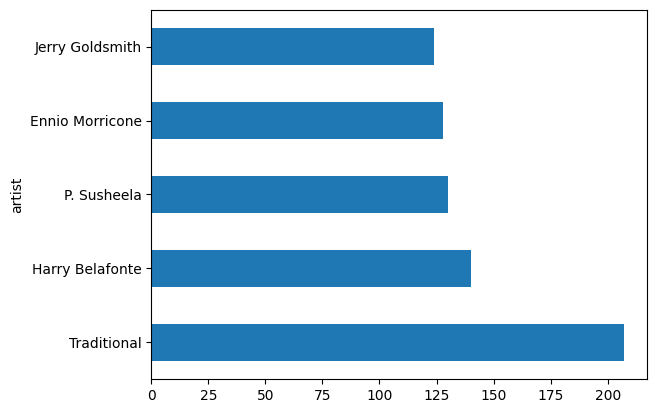

In [25]:
import matplotlib.pyplot as plt

top_5_artists.plot.barh()
plt.show()

## Top 5 Loudest Tracks

In [28]:
#	Top 5 loudest tracks
top_5_loudest_tracks = df[['loudness', 'track']].sort_values(by = 'loudness', ascending = True)[:5]
top_5_loudest_tracks


,loudness,track
28302,-49.253,Bar 641-655
30718,-47.327,Spiegel im Spiegel
37976,-46.655,Brown Noise Train
30913,-44.347,In A Landscape
27516,-43.989,The Ivanov Suite: II. The Scream


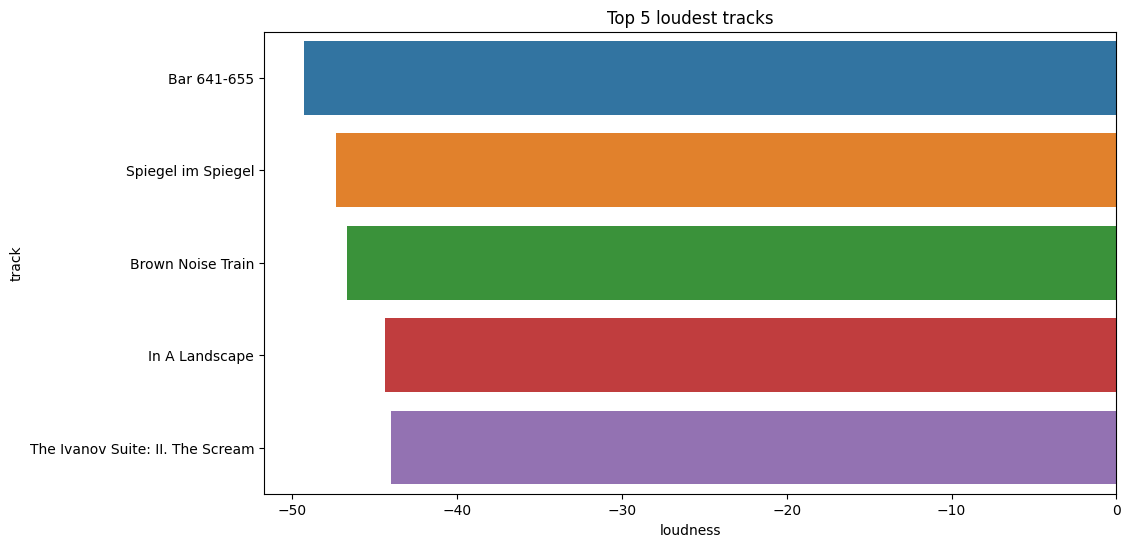

In [33]:
plt.figure(figsize = (11,6))
sns.barplot(x = 'loudness', y = "track" , data = top_5_loudest_tracks)
plt.title("Top 5 loudest tracks")
plt.show()

##Artist with the most danceability song

In [34]:
danceability_songs = df[['danceability', 'track', 'artist']].sort_values(by = "danceability", ascending = False)[:5]
danceability_songs

,danceability,track,artist
23075,0.988,Funky Cold Medina,Tone-Loc
31484,0.986,Go Girl,Pitbull Featuring Trina & Young Bo$$
37700,0.981,Cash Me Outside (#CashMeOutside),DJ Suede The Remix God
37093,0.980,Ice Ice Baby,Glee Cast
20832,0.980,State of Shock,The Jacksons


In [63]:
plt.figure(figsize = (7,5))
sns.barplot(x='danceability', y='artist', data = danceability_songs)
plt.title("Danceability songs")
plt.show()

ValueError: ignored

<Figure size 700x500 with 1 Axes>

##Top 10 Instrumentalness songs

In [46]:
top_ten_instrumentalness_songs = df[['instrumentalness','track','artist']].sort_values(by = 'instrumentalness', ascending = False)[:5]
top_ten_instrumentalness_songs

,instrumentalness,track,artist
21718,1.000,Rainy Alley,Nataural
2795,0.999,Tema drammatico 3,Giovanni Fusco
20971,0.999,Stormy Rain,Nataural
22365,0.999,Under Shelter Rain,Nataural
18285,0.999,Deep Rain,Nataural


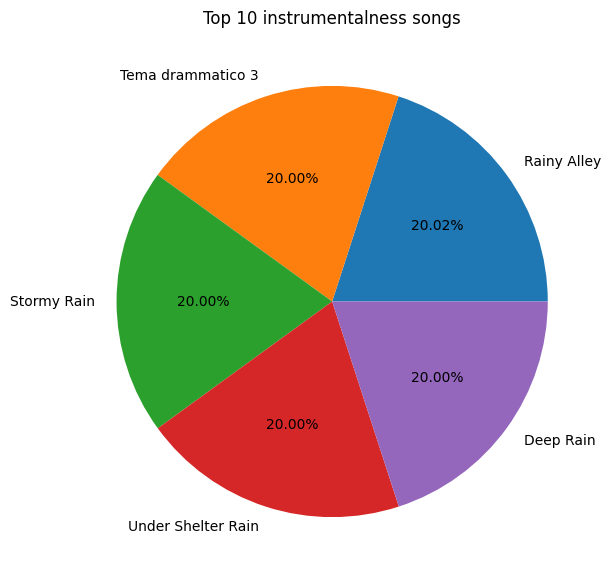

In [50]:
plt.figure(figsize = (10,7))
plt.pie(x='instrumentalness',data = top_ten_instrumentalness_songs, autopct='%1.2f%%', labels = top_ten_instrumentalness_songs.track)
plt.title("Top 10 instrumentalness songs")
plt.show()

##Mutliple Feature PLot

In [55]:
interest_feature_cols = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']


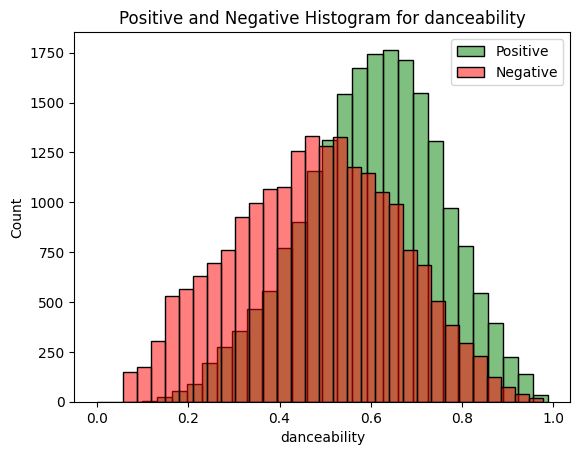

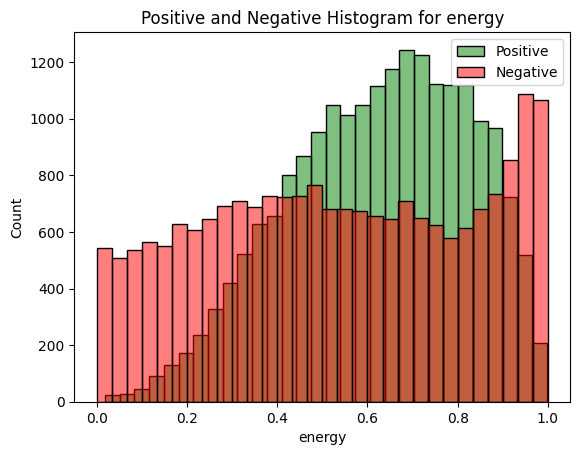

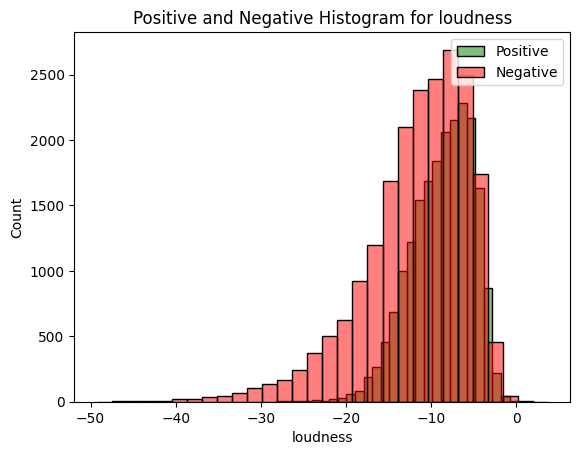

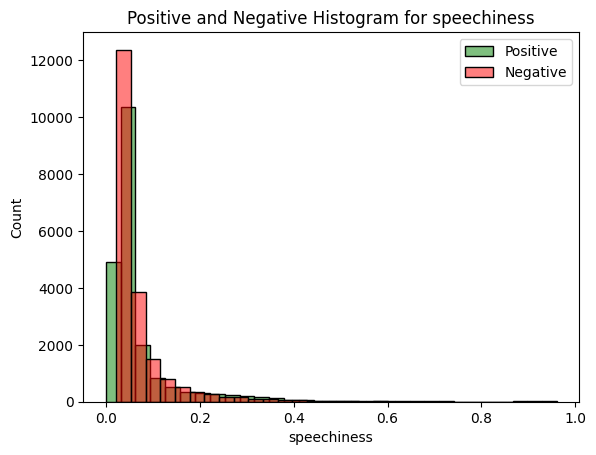

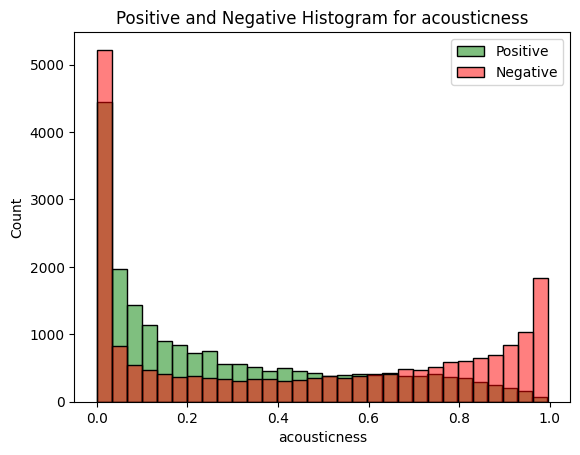

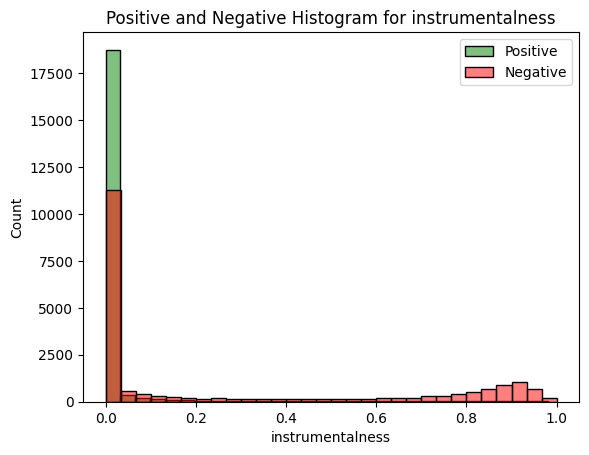

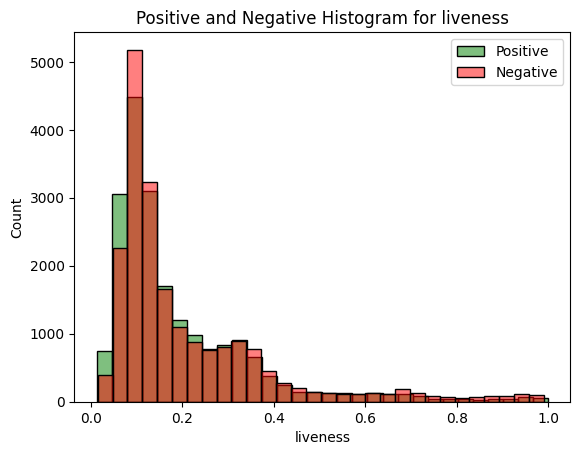

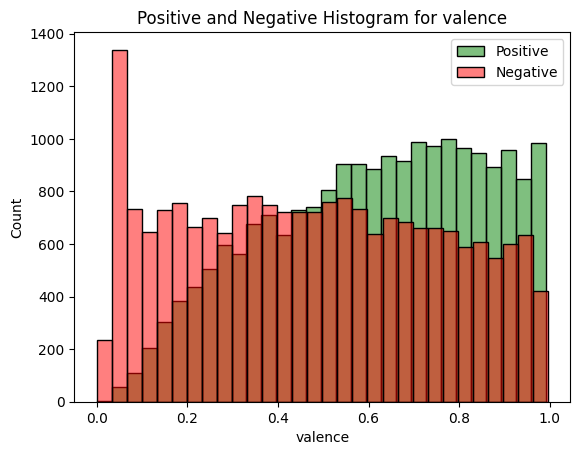

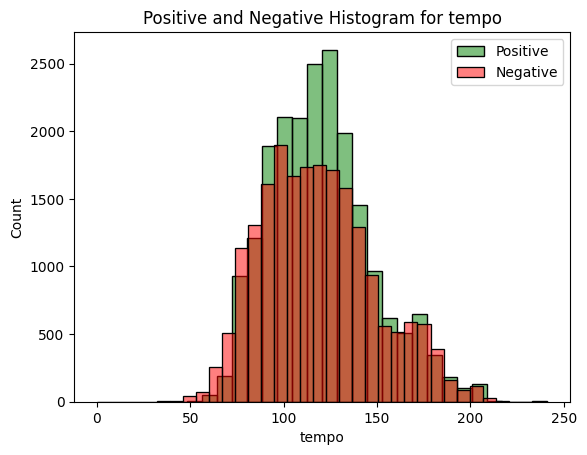

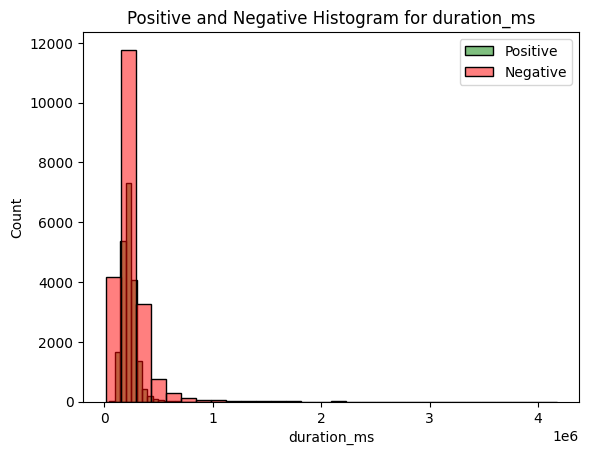

In [61]:
for feature_col in interest_feature_cols:
  pos_data = df[df["popularity"] == 1][feature_col]
  neg_data = df[df["popularity"] == 0][feature_col]

  sns.histplot(pos_data, bins=30, label="Positive", color='green', alpha=0.5, multiple='stack')
  sns.histplot(neg_data, bins=30, label="Negative", color='red', alpha=0.5, multiple='stack')


  plt.legend(loc = 'upper right')
  plt.title(f"Positive and Negative Histogram for {feature_col}")
  plt.show()